# Imports

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn.model_selection import learning_curve
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

import time

import mlrose_hiive as mlrose

# Part 2 - Comparisons of ANN Optimization

In [3]:
## import breast cancer data
data = pd.read_csv('data/data.csv')

In [4]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
## Separate the training examples and the target outputs
y = data['diagnosis']
x = data.drop(['id', 'diagnosis', 'Unnamed: 32'], axis=1)

In [6]:
## Change classiication to 0 and 1 and do the train/test/splits

y = y.apply(lambda q: 0 if q == 'B' else 1)
X_real_train, X_real_test, y_real_train, y_real_test = train_test_split(x, y, test_size=0.2, random_state=0)

### Original Neural Network

In [7]:
def ANN(X_train, X_test, y_train, y_test):
    classifier = MLPClassifier(random_state=0, max_iter=5000)
    classifier.fit(X_train, y_train)
    
    y_predicted = classifier.predict(X_test)
    score = metrics.f1_score(y_test, y_predicted)
    
    matrix = confusion_matrix(y_test, y_predicted)
    confusion = pd.DataFrame(matrix, index=['is_cancer', 'is_healthy'], 
                             columns=['predicted_cancer', 'predicted_healthy'])
    
    print("Confusion Matrix: ", confusion)
    return classifier, score

### Learning Curve

In [8]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(classifier, x, y, title):
    n = len(y)
    train_size = np.linspace(0.1, 1.0, 20)
    
    _, train_scores, test_scores = learning_curve(classifier, x, y, scoring='f1', train_sizes=train_size, cv=5)
    
    plt.figure()
    plt.plot(train_size, np.mean(train_scores, axis=1), 'o-', label="Training Score")
    plt.plot(train_size, np.mean(test_scores, axis=1), 'o-', label="Cross-Validation Score")
    plt.title(title)
    plt.xlabel("Fraction of DataSet")
    plt.ylabel("Classification Score")
    plt.legend(loc="best")
    plt.grid(axis='both')
    
    plt.savefig('SVMLineartuned.png')

### Confusion Matrix

In [9]:
from sklearn.metrics import confusion_matrix

def confusion_mat(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)

### Untuned

In [ ]:
kf = KFold(n_splits=5, random_state=0, shuffle=True)
kf.get_n_splits(X_real_train)

NeuralNetworkScore = []
NN_classifier = []

i = 1

nn_estimator = MLPClassifier(random_state=0, max_iter=5000)

for train_index, test_index in kf.split(X_real_train):
    print("----------------------------------------------------------------------------------------")
    print("Iteration Number: ", i)
    X_train, X_test = X_real_train.iloc[train_index], X_real_train.iloc[test_index]
    y_train, y_test = y_real_train.iloc[train_index], y_real_train.iloc[test_index]
    
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)
    
    ## Neural Network
    nn_estimator.fit(X_train, y_train)
    y_pred = nn_estimator.predict(X_test)
    score = metrics.f1_score(y_test, y_pred)
    print("Neural Network Score: ", score)
    print("/n")
    
    i += 1
    

# print("Average Scores: ")
# print("Neural Network Score: ", sum(NeuralNetworkScore)/len(NeuralNetworkScore))



## Plot Learning Curve

# index = NeuralNetworkScore.index(max(NeuralNetworkScore))
# best_classifier = NN_classifier[index]
plot_learning_curve(nn_estimator, X_real_train, y_real_train, title="Learning Curvive for ANN")
# NN_Final_Classifier = best_classifier

----------------------------------------------------------------------------------------
Iteration Number:  1
Neural Network Score:  0.8571428571428571
/n
----------------------------------------------------------------------------------------
Iteration Number:  2
Neural Network Score:  0.8405797101449275
/n
----------------------------------------------------------------------------------------
Iteration Number:  3
Neural Network Score:  0.8923076923076922
/n
----------------------------------------------------------------------------------------
Iteration Number:  4
Neural Network Score:  0.7857142857142858
/n
----------------------------------------------------------------------------------------
Iteration Number:  5
Neural Network Score:  0.9714285714285714
/n


#### Hyperparamter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
import time

alpha = np.linspace(0.001, 0.1, 100)

parameters = [{'alpha': alpha}]


t0 = time.time()
print("Searching:")
classifier = GridSearchCV(MLPClassifier(activation='logistic', 
                                        hidden_layer_sizes=(40,), max_iter=5000), parameters, 'f1')
classifier.fit(X_train, y_train)
t1 = time.time()
total_time = t1 - t0

print("Total time taken: ", total_time)
print(classifier.best_params_)

#### Tuned

----------------------------------------------------------------------------------------
Iteration Number:  1
Neural Network Score:  0.923076923076923
/n
----------------------------------------------------------------------------------------
Iteration Number:  2
Neural Network Score:  0.8656716417910447
/n
----------------------------------------------------------------------------------------
Iteration Number:  3
Neural Network Score:  0.888888888888889
/n
----------------------------------------------------------------------------------------
Iteration Number:  4
Neural Network Score:  0.88
/n
----------------------------------------------------------------------------------------
Iteration Number:  5
Neural Network Score:  0.9714285714285714
/n
Total Time Taken:  6.139577150344849


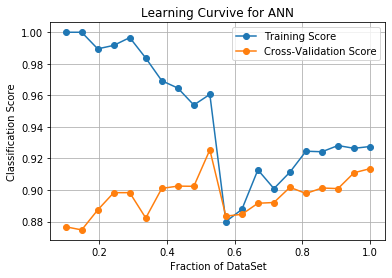

In [71]:
kf = KFold(n_splits=5, random_state=0, shuffle=True)
kf.get_n_splits(X_real_train)

NeuralNetworkScore = []
NN_classifier = []

i = 1

start_time = time.time()

nn_estimator = MLPClassifier(activation='logistic', hidden_layer_sizes=(40,),
                             random_state=0, max_iter=10000, alpha=0.017)

for train_index, test_index in kf.split(X_real_train):
    print("----------------------------------------------------------------------------------------")
    print("Iteration Number: ", i)
    X_train, X_test = X_real_train.iloc[train_index], X_real_train.iloc[test_index]
    y_train, y_test = y_real_train.iloc[train_index], y_real_train.iloc[test_index]
    
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)
    
    ## Neural Network
    nn_estimator.fit(X_train, y_train)
    y_pred = nn_estimator.predict(X_test)
    score = metrics.f1_score(y_test, y_pred)
    print("Neural Network Score: ", score)
    print("/n")
    
    i += 1
    

# print("Average Scores: ")
# print("Neural Network Score: ", sum(NeuralNetworkScore)/len(NeuralNetworkScore))

end_time = time.time()
print("Total Time Taken: ", end_time - start_time)


## Plot Learning Curve

# index = NeuralNetworkScore.index(max(NeuralNetworkScore))
# best_classifier = NN_classifier[index]
plot_learning_curve(nn_estimator, X_real_train, y_real_train, title="Learning Curvive for ANN")
# NN_Final_Classifier = best_classifier

#### Using MLROSE library

In [12]:
kf = KFold(n_splits=5, random_state=0, shuffle=True)
kf.get_n_splits(X_real_train)

NeuralNetworkScore = []
NN_classifier = []

i = 1

start_time = time.time()

# nn_estimator = MLPClassifier(activation='logistic', hidden_layer_sizes=(40,),
#                              random_state=0, max_iter=10000, alpha=0.017)

nn_estimator = mlrose.NeuralNetwork(hidden_nodes = [40], activation = 'sigmoid', \
                                 algorithm = 'gradient_descent', max_iters = 1000, \
                                 bias = True, is_classifier = True, learning_rate = 0.017, \
                                 early_stopping = True, clip_max = 5, max_attempts = 100, \
                                 random_state = 0)

for train_index, test_index in kf.split(X_real_train):
    print("----------------------------------------------------------------------------------------")
    print("Iteration Number: ", i)
    X_train, X_test = X_real_train.iloc[train_index], X_real_train.iloc[test_index]
    y_train, y_test = y_real_train.iloc[train_index], y_real_train.iloc[test_index]
    
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)
    
    ## Neural Network
    nn_estimator.fit(X_train, y_train)
    y_pred = nn_estimator.predict(X_test)
    score = metrics.f1_score(y_test, y_pred)
    print("Neural Network Score: ", score)
    print("/n")
    
    i += 1
    

# print("Average Scores: ")
# print("Neural Network Score: ", sum(NeuralNetworkScore)/len(NeuralNetworkScore))

end_time = time.time()
print("Total Time Taken: ", end_time - start_time)


## Plot Learning Curve

# index = NeuralNetworkScore.index(max(NeuralNetworkScore))
# best_classifier = NN_classifier[index]
# plot_learning_curve(nn_estimator, X_real_train, y_real_train, title="Learning Curve for ANN")
# NN_Final_Classifier = best_classifier

----------------------------------------------------------------------------------------
Iteration Number:  1
Neural Network Score:  0.0
/n
----------------------------------------------------------------------------------------
Iteration Number:  2
Neural Network Score:  0.0
/n
----------------------------------------------------------------------------------------
Iteration Number:  3
Neural Network Score:  0.0
/n
----------------------------------------------------------------------------------------
Iteration Number:  4
Neural Network Score:  0.0
/n
----------------------------------------------------------------------------------------
Iteration Number:  5
Neural Network Score:  0.9411764705882353
/n
Total Time Taken:  18.234129905700684


### Random Hill Climbing Neural Network

----------------------------------------------------------------------------------------
Iteration Number:  1
Confusion Matrix:              predicted_cancer  predicted_healthy
is_cancer                 46                  9
is_healthy                31                  5
Neural Network Score:  0.2


----------------------------------------------------------------------------------------
Iteration Number:  2
Confusion Matrix:              predicted_cancer  predicted_healthy
is_cancer                 61                  0
is_healthy                30                  0
Neural Network Score:  0.0


----------------------------------------------------------------------------------------
Iteration Number:  3
Confusion Matrix:              predicted_cancer  predicted_healthy
is_cancer                 61                  0
is_healthy                30                  0
Neural Network Score:  0.0


----------------------------------------------------------------------------------------
Itera

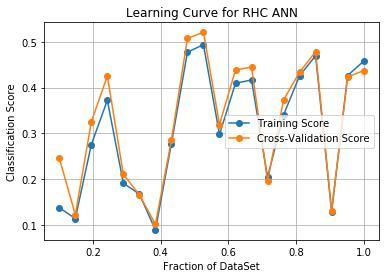

In [13]:
kf = KFold(n_splits=5, random_state=0, shuffle=True)
kf.get_n_splits(X_real_train)

NeuralNetworkScore = []
NN_classifier = []

i = 1

start_time = time.time()

nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [40], activation = 'sigmoid', \
                                 algorithm = 'random_hill_climb', max_iters = 1000, \
                                 bias = True, is_classifier = True, learning_rate = 0.017, \
                                 early_stopping = True, clip_max = 5, max_attempts = 100, \
                                 random_state = 0)


for train_index, test_index in kf.split(X_real_train):
    print("----------------------------------------------------------------------------------------")
    print("Iteration Number: ", i)
    X_train, X_test = X_real_train.iloc[train_index], X_real_train.iloc[test_index]
    y_train, y_test = y_real_train.iloc[train_index], y_real_train.iloc[test_index]
    
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)
    
    ## Neural Network
    nn_model1.fit(X_train, y_train)
    y_pred = nn_model1.predict(X_test)
    score = metrics.f1_score(y_test, y_pred)
    matrix = confusion_matrix(y_test, y_pred)
    confusion = pd.DataFrame(matrix, index=['is_cancer', 'is_healthy'], 
                             columns=['predicted_cancer', 'predicted_healthy'])
    
    print("Confusion Matrix: ", confusion)
    print("Neural Network Score: ", score)
    print("\n")
    
    i += 1
    
end_time = time.time()
print("Total Time Taken: ", end_time - start_time)

## Plot Learning Curve

# index = NeuralNetworkScore.index(max(NeuralNetworkScore))
# best_classifier = NN_classifier[index]
plot_learning_curve(nn_model1, X_real_train, y_real_train, title="Learning Curve for RHC ANN")
# NN_Final_Classifier = best_classifier

### Simulated Annealing Neural Network

In [14]:
kf = KFold(n_splits=5, random_state=0, shuffle=True)
kf.get_n_splits(X_real_train)

NeuralNetworkScore = []
NN_classifier = []

i = 1

start_time = time.time()

nn_model2 = mlrose.NeuralNetwork(hidden_nodes = [40], activation = 'sigmoid', \
                                 algorithm = 'simulated_annealing', max_iters = 5000, \
                                 bias = True, is_classifier = True, learning_rate = 0.017, \
                                 early_stopping = True, clip_max = 5, max_attempts = 100, \
                                 random_state = 0)


for train_index, test_index in kf.split(X_real_train):
    print("----------------------------------------------------------------------------------------")
    print("Iteration Number: ", i)
    X_train, X_test = X_real_train.iloc[train_index], X_real_train.iloc[test_index]
    y_train, y_test = y_real_train.iloc[train_index], y_real_train.iloc[test_index]
    
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)
    
    ## Neural Network
    nn_model2.fit(X_train, y_train)
    y_pred = nn_model2.predict(X_test)
    score = metrics.f1_score(y_test, y_pred)
    matrix = confusion_matrix(y_test, y_pred)
    confusion = pd.DataFrame(matrix, index=['is_cancer', 'is_healthy'], 
                             columns=['predicted_cancer', 'predicted_healthy'])
    
    print("Confusion Matrix: ", confusion)
    print("Neural Network Score: ", score)
    print("\n")
    
    i += 1
    
end_time = time.time()
print("Total Time Taken: ", end_time - start_time)

## Plot Learning Curve

# index = NeuralNetworkScore.index(max(NeuralNetworkScore))
# best_classifier = NN_classifier[index]
# plot_learning_curve(nn_model1, X_real_train, y_real_train, title="Learning Curve for SA ANN")
# NN_Final_Classifier = best_classifier

----------------------------------------------------------------------------------------
Iteration Number:  1
Confusion Matrix:              predicted_cancer  predicted_healthy
is_cancer                 55                  0
is_healthy                36                  0
Neural Network Score:  0.0


----------------------------------------------------------------------------------------
Iteration Number:  2
Confusion Matrix:              predicted_cancer  predicted_healthy
is_cancer                  0                 61
is_healthy                 0                 30
Neural Network Score:  0.49586776859504134


----------------------------------------------------------------------------------------
Iteration Number:  3
Confusion Matrix:              predicted_cancer  predicted_healthy
is_cancer                 45                 16
is_healthy                30                  0
Neural Network Score:  0.0


------------------------------------------------------------------------------

### Genetic Algorithm Neural Network

----------------------------------------------------------------------------------------
Iteration Number:  1
Confusion Matrix:              predicted_cancer  predicted_healthy
is_cancer                 52                  3
is_healthy                 1                 35
Neural Network Score:  0.9459459459459458


----------------------------------------------------------------------------------------
Iteration Number:  2
Confusion Matrix:              predicted_cancer  predicted_healthy
is_cancer                 45                 16
is_healthy                 0                 30
Neural Network Score:  0.7894736842105263


----------------------------------------------------------------------------------------
Iteration Number:  3
Confusion Matrix:              predicted_cancer  predicted_healthy
is_cancer                 56                  5
is_healthy                 3                 27
Neural Network Score:  0.870967741935484


--------------------------------------------------

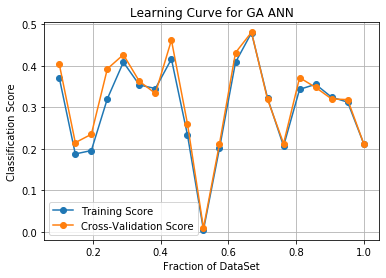

In [15]:
kf = KFold(n_splits=5, random_state=0, shuffle=True)
kf.get_n_splits(X_real_train)

NeuralNetworkScore = []
NN_classifier = []

i = 1

start_time = time.time()

nn_model3 = mlrose.NeuralNetwork(hidden_nodes = [40], activation = 'sigmoid', \
                                 algorithm = 'genetic_alg', max_iters = 1000, \
                                 bias = True, is_classifier = True, learning_rate = 0.017, \
                                 early_stopping = True, clip_max = 5, max_attempts = 100, \
                                 random_state = 0)


for train_index, test_index in kf.split(X_real_train):
    print("----------------------------------------------------------------------------------------")
    print("Iteration Number: ", i)
    X_train, X_test = X_real_train.iloc[train_index], X_real_train.iloc[test_index]
    y_train, y_test = y_real_train.iloc[train_index], y_real_train.iloc[test_index]
    
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)
    
    ## Neural Network
    nn_model3.fit(X_train, y_train)
    y_pred = nn_model3.predict(X_test)
    score = metrics.f1_score(y_test, y_pred)
    matrix = confusion_matrix(y_test, y_pred)
    confusion = pd.DataFrame(matrix, index=['is_cancer', 'is_healthy'], 
                             columns=['predicted_cancer', 'predicted_healthy'])
    
    print("Confusion Matrix: ", confusion)
    print("Neural Network Score: ", score)
    print("\n")
    
    i += 1
    
end_time = time.time()
print("Total Time Taken: ", end_time - start_time)

## Plot Learning Curve

# index = NeuralNetworkScore.index(max(NeuralNetworkScore))
# best_classifier = NN_classifier[index]
plot_learning_curve(nn_model1, X_real_train, y_real_train, title="Learning Curve for GA ANN")
# NN_Final_Classifier = best_classifier

# Test Scores

In [16]:
# Final_DT_Classifier
# final_knn_classifier
# final_svm_classifier
# final_boosting_classifier
# final_ann_classifier

# X_real_test
# y_real_test

original_predicted = nn_estimator.predict(X_real_test)
original_score = metrics.f1_score(original_predicted, y_real_test)

print("Original Score: ", original_score)

RHC_predicted = nn_model1.predict(X_real_test)
RHC_score = metrics.f1_score(RHC_predicted, y_real_test)

print("RHC Score: ", RHC_score)

SA_predicted = nn_model2.predict(X_real_test)
SA_score = metrics.f1_score(SA_predicted, y_real_test)

print("SA Score: ", SA_score)

GA_predicted =  nn_model3.predict(X_real_test)
GA_score = metrics.f1_score(GA_predicted, y_real_test)

print("GA Score: ", GA_score)

Original Score:  0.5838509316770186
RHC Score:  0.5838509316770186
SA Score:  0.08163265306122448
GA Score:  0.5838509316770186
